<a href="https://colab.research.google.com/github/2215151050haque/ML-Project/blob/main/2215151050_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, RandomContrast


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dataset_path = '/content/drive/MyDrive/Datasets'
img_size = (224, 224)
batch_size = 32
seed = 42

In [33]:
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    seed=seed,
    shuffle=True
)

Found 1570 files belonging to 15 classes.


In [34]:
dataset_size = len(full_ds)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size

train_ds = full_ds.take(train_size)
test_ds = full_ds.skip(train_size)

In [35]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomBrightness(0.2),
    RandomContrast(0.2),
])

In [36]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

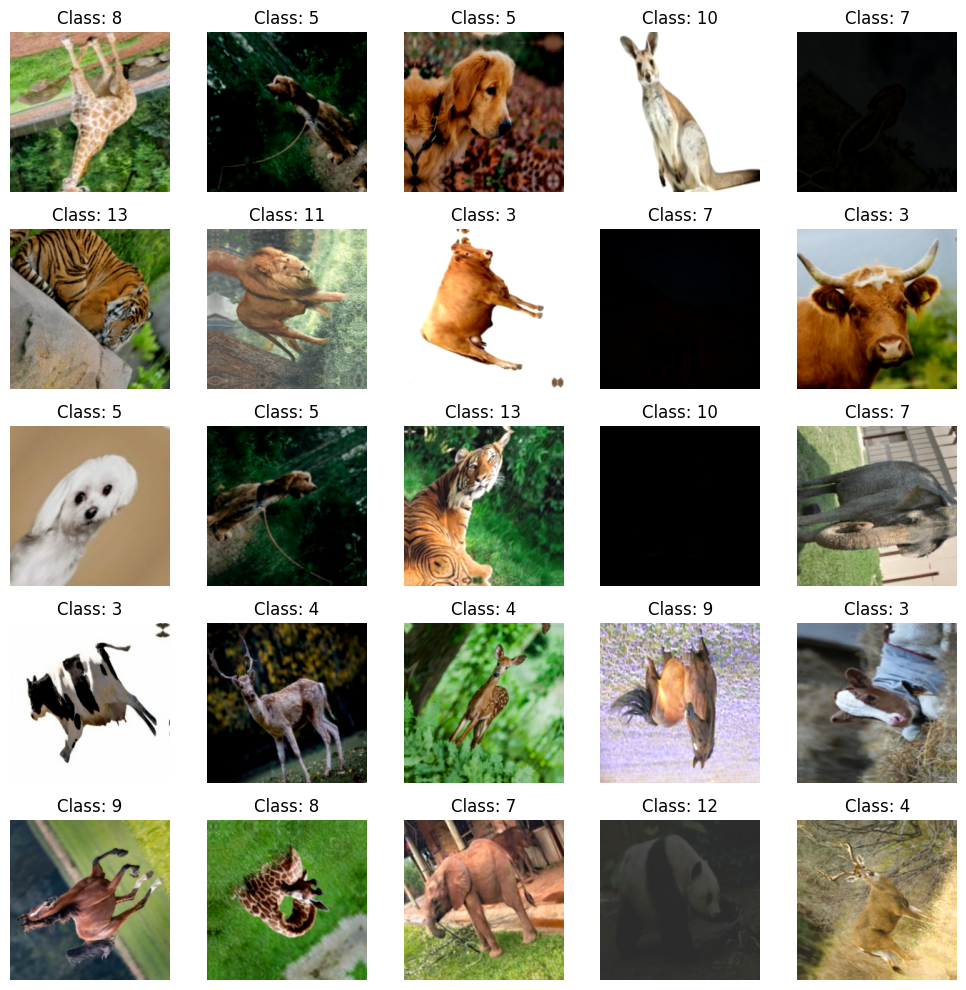

In [37]:
image_batch, label_batch = next(iter(augmented_train_ds))
num_images_to_display = 25
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(num_images_to_display):
    ax = axes[i // 5, i % 5]
    ax.imshow(image_batch[i].numpy().astype("uint8"))
    ax.set_title(f"Class: {label_batch[i].numpy()}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [38]:
AUTOTUNE = tf.data.AUTOTUNE
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [39]:
model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3), name='input_layer'),
    Rescaling(1./255),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    MaxPooling2D((3, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(full_ds.class_names), activation='softmax')
])

In [40]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 454,751 (1.73 MB)

 Trainable params: 454,751 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(augmented_train_ds, epochs=30)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.0909 - loss: 2.6309
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.1585 - loss: 2.3891
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 385ms/step - accuracy: 0.2535 - loss: 2.2195
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 381ms/step - accuracy: 0.2636 - loss: 2.1338
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 383ms/step - accuracy: 0.3059 - loss: 2.0355
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 377ms/step - accuracy: 0.3225 - loss: 1.9200
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 363ms/step - accuracy: 0.4247 - loss: 1.7419
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.3784 - loss: 1.7456
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 405ms/step - accuracy: 0.4215 - loss: 1.6869
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 362ms/step - accuracy: 0.4301 - loss: 1.6396
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 361ms/step - accuracy: 0.4841 - loss: 1.5263
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 3

In [43]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7553 - loss: 0.7536
Test Accuracy: 0.77
